In [1]:
# Following is a preliminary comparison between MMJ-K-means and HDBSCAN. 
# A thorough comparison needs more experiments.



In [2]:
exec(open("./funcs/mmj_functions.py").read())
exec(open("./funcs/algo_4_funcs.py").read()) 


In [3]:
test_data_145 = pickle.load(  open( "./data/test_data_145.p", "rb" ) ) 


In [4]:
def MMJ_K_means_select_best_K_method_A(X, mmj_matrix):
    
    global dis_matrix 
    
    score_list = []
    
    mmj_matrix_squared = mmj_matrix**2
    
    K_list = np.arange(2,31)
    
    K_list = [int(i) for i in K_list]
    
    for num_clusters in K_list:
 
        result = MMJ_K_means_using_PAM_algo(X, num_clusters, mmj_matrix_squared, plot = 0)
 
        label, strong_ambi_p_idx, weak_ambi_p_idx = result[0],result[1],result[2] 
    
        dis_matrix = mmj_matrix
  
        score = mmj_calinski_harabasz_score(X, label)
    
        score_list.append(score)
    best_K = K_list[np.argmax(score_list)]
    
    return best_K, score_list

In [5]:
def plot_2D_or_3D_data_test(data, labels, centers_idx, strong_ambi_p_idx, weak_ambi_p_idx):

    a,b = data.shape
    if centers_idx is not None:
        centers_idx = centers_idx.copy()
        centers_idx = [ii[0] for ii in centers_idx]
        
    ambi_p_idx = strong_ambi_p_idx + weak_ambi_p_idx
    
    non_ambi_p_idx = [ii for ii in range(a) if ii not in ambi_p_idx]
    
    new_data = data[non_ambi_p_idx]
    new_labels = labels[non_ambi_p_idx]
 
    markers = ["." , "+", "s" , "x", "v" , "1" , "p", "P", "*", "o" , "d"]
    if b == 2:
        if labels is not None:
            X_divide = got_X_divide_from_labels(new_data, new_labels)
            for tt in range(len(X_divide)):
                plt.scatter(X_divide[tt][:,0],X_divide[tt][:,1], marker=markers[tt%len(markers)])
            if strong_ambi_p_idx:
                plt.scatter(data[strong_ambi_p_idx][:,0],data[strong_ambi_p_idx][:,1], facecolors='k', color = 'k', s=15)
            if weak_ambi_p_idx:
                plt.scatter(data[weak_ambi_p_idx][:,0],data[weak_ambi_p_idx][:,1], facecolors='none', color = 'k', s=15)
            if centers_idx:
                plt.scatter(data[centers_idx][:,0], data[centers_idx][:,1], c ="r",  marker= "*")
            plt.axis('square')
            plt.show()                        
 
    elif b == 3:
        fig = plt.figure()
        adata = fig.add_subplot(111, projection='3d')
        if labels is not None:
            X_divide = got_X_divide_from_labels(new_data, new_labels)
            for tt in range(len(X_divide)):
                adata.scatter(X_divide[tt][:,0],X_divide[tt][:,1], X_divide[tt][:,2],marker=markers[tt%len(markers)]) 
            if strong_ambi_p_idx:
                adata.scatter(data[strong_ambi_p_idx][:,0],data[strong_ambi_p_idx][:,1], data[strong_ambi_p_idx][:,2], facecolor='k', edgecolor='k', s=15)
            if weak_ambi_p_idx:
                adata.scatter(data[weak_ambi_p_idx][:,0],data[weak_ambi_p_idx][:,1], data[weak_ambi_p_idx][:,2], facecolor=(0,0,0,0), edgecolor='k', s=15)
            if centers_idx:
                plt.scatter(data[centers_idx][:,0], data[centers_idx][:,1], c ="r",  marker= "*")
            plt.axis('square')
            plt.show()

In [6]:
def MMJ_K_means_using_PAM_algo(X, num_clusters, mmj_matrix, plot = False): 
 
    km_model = kmedoids.fasterpam(mmj_matrix, num_clusters)
   
    label = km_model.labels
    centers_idx = [[ii] for ii in km_model.medoids]
 
    dis_to_medoids = np.array([[mmj_matrix[i,j] for j in km_model.medoids] for i in range(len(X))])
    min_dis_to_medoids = np.min(dis_to_medoids, axis = 1)

    strong_ambi_p_idx, weak_ambi_p_idx = [], []
    for i, _ in enumerate(dis_to_medoids):   
        ppp = np.sum(dis_to_medoids[i] == min_dis_to_medoids[i])
        if  ppp == 1:
            pass      
        elif ppp == num_clusters:
            strong_ambi_p_idx.append(i)      
        else:
            weak_ambi_p_idx.append(i)
    if plot: 
        if strong_ambi_p_idx or weak_ambi_p_idx:
            plot_2D_or_3D_data_test(X, label, centers_idx, strong_ambi_p_idx, weak_ambi_p_idx)
      
        else:
            plot_2D_or_3D_data_test(X, label, centers_idx,  strong_ambi_p_idx = [], weak_ambi_p_idx = [])

        
    return [label, strong_ambi_p_idx, weak_ambi_p_idx, centers_idx]

In [7]:
import hdbscan

In [8]:
from importlib.metadata import version
version('hdbscan')

'0.8.37'

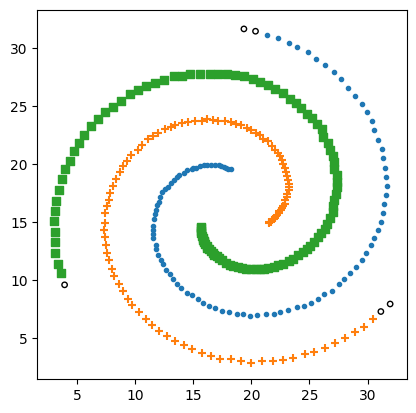

In [9]:
data_id  = 106

X = test_data_145[data_id] 

label = hdbscan.HDBSCAN().fit_predict(X)
 
weak_ambi_p_idx = [ii for ii in range(len(X)) if label[ii] == -1]
 
plot_2D_or_3D_data_test(X, label, centers_idx = None,  strong_ambi_p_idx = [], weak_ambi_p_idx = weak_ambi_p_idx)


best_K:  3


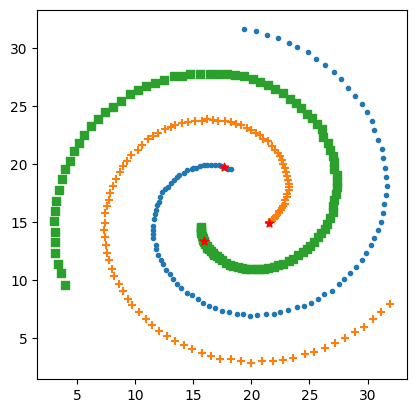

In [10]:
data_id  = 106

X = test_data_145[data_id] 
 
mmj_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)

mmj_matrix_squared = mmj_matrix**2 

# select best_K from range(2,31)
best_K, score_list = MMJ_K_means_select_best_K_method_A(X, mmj_matrix)

print("best_K: ", best_K)

result = MMJ_K_means_using_PAM_algo(X, best_K, mmj_matrix_squared, plot = True)
 

In [11]:
# The three clusters of data 106 are well separated. 
# HDBSCAN wrongly labeled five points (the five black circles) as noise/outliers. 
# While MMJ-K-means labeled the data correctly. All the hyper-parameters of HDBSCAN are set to default. 
# The best K of MMJ-K-means is automatically selected by MMJ-CH from range(2, 31).



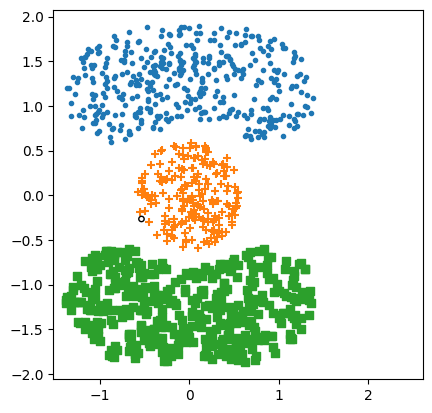

In [12]:
data_id  = 79

X = test_data_145[data_id] 

label = hdbscan.HDBSCAN().fit_predict(X)
 
weak_ambi_p_idx = [ii for ii in range(len(X)) if label[ii] == -1]

plot_2D_or_3D_data_test(X, label, centers_idx = None,  strong_ambi_p_idx = [], weak_ambi_p_idx = weak_ambi_p_idx)


best_K:  3


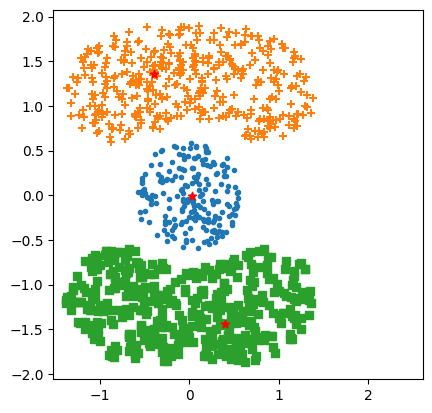

In [13]:
data_id  = 79

X = test_data_145[data_id] 
 
mmj_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)

mmj_matrix_squared = mmj_matrix**2 

# select best_K from range(2,31)
best_K, score_list = MMJ_K_means_select_best_K_method_A(X, mmj_matrix)

print("best_K: ", best_K)

result = MMJ_K_means_using_PAM_algo(X, best_K, mmj_matrix_squared, plot = True)

In [14]:
# The three clusters of data 79 are well separated. 
# HDBSCAN wrongly labeled one point (the black circle) as noise/outliers. 
# While MMJ-K-means labeled the data correctly. All the hyper-parameters of HDBSCAN are set to default. 
# The best K of MMJ-K-means is automatically selected by MMJ-CH from range(2, 31).


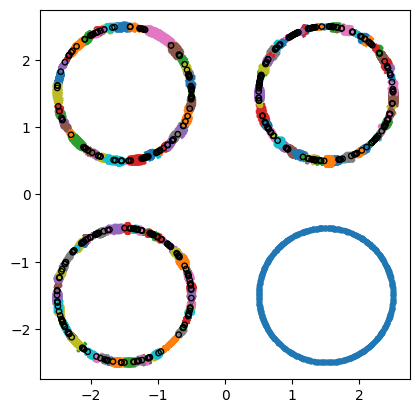

In [15]:
data_id  = 127

X = test_data_145[data_id] 

label = hdbscan.HDBSCAN().fit_predict(X)
 
weak_ambi_p_idx = [ii for ii in range(len(X)) if label[ii] == -1]

plot_2D_or_3D_data_test(X, label, centers_idx = None,  strong_ambi_p_idx = [], weak_ambi_p_idx = weak_ambi_p_idx)


best_K:  4


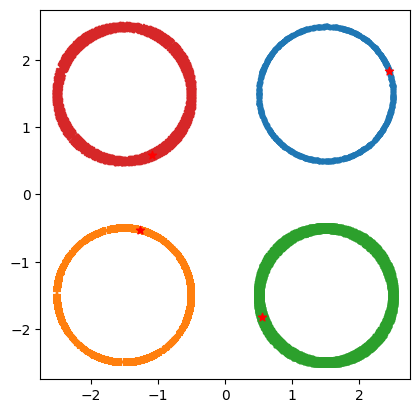

In [16]:
data_id  = 127

X = test_data_145[data_id] 
 
mmj_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)

mmj_matrix_squared = mmj_matrix**2 

# select best_K from range(2,31)
best_K, score_list = MMJ_K_means_select_best_K_method_A(X, mmj_matrix)

print("best_K: ", best_K)

result = MMJ_K_means_using_PAM_algo(X, best_K, mmj_matrix_squared, plot = True)

In [17]:
# The four clusters of data 127 are well separated. 
# HDBSCAN totally mislabeled the data.
# While MMJ-K-means labeled the data correctly. All the hyper-parameters of HDBSCAN are set to default. 
# The best K of MMJ-K-means is automatically selected by MMJ-CH from range(2, 31).
